In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
#check if seaborn is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'seaborn'])
except subprocess.CalledProcessError:
    # Seaborn is not installed
    %pip install seaborn
else:
    print('Seaborn is already installed.')

Seaborn is already installed.


In [3]:
#check if plotly is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'plotly'])
except subprocess.CalledProcessError:
    # plotly is not installed
    %pip install plotly
else:
    print('plotly is already installed.')



plotly is already installed.


In [4]:
#check if xgboost is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'xgboost'])
except subprocess.CalledProcessError:
    # xgboost is not installed
    %pip install xgboost
else:
    print('xgboost is already installed.')

xgboost is already installed.


In [5]:
# import necessary libraries

import pandas as pd
import numpy as np
import xgboost as xgb
import datetime


from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder


# Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [6]:
# import populated_df as df

df = pd.read_csv('populated_df.csv')

In [7]:
df['Label'].value_counts()

# we have 7878 rows data and 290 of them are labeled as 1. This means that 290 members attempted gaming the system.


0    7588
1     290
Name: Label, dtype: int64

In [8]:
# get the gaming the system data

df.loc[df['Label'] == 1]

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
7,2910824,182157124583,10002,1,5,5,0,50,2021-09-17 18:27:23,2021-09-17 18:28:56,73,414086,6,1,3,3,268,2699,2967,1,7.0
10,2910824,808509304221,9662,1,5,3,2,50,2021-09-23 20:34:34,2021-09-23 20:36:56,119,639881,6,3,7,7,0,988,988,1,12.0
12,2910824,808509304221,9662,1,7,2,1,70,2021-09-23 20:37:06,2021-09-23 20:39:08,100,639881,6,3,7,7,0,988,988,1,4.0
16,2910824,636098373206,8971,1,9,1,0,90,2021-09-29 19:09:41,2021-09-29 19:10:39,33,851286,6,2,6,6,104,3489,3593,1,5.0
17,2910824,636098373206,8971,1,10,0,0,100,2021-09-29 19:10:26,2021-09-29 19:11:20,29,851286,6,2,6,6,104,3489,3593,1,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,2412813571,354759714339,4462,1,8,2,0,80,2021-09-30 20:42:20,2021-09-30 20:43:08,23,895661,7,11,5,6,3911,3541,7452,1,9.0
7797,2412813571,354759714339,4462,1,10,0,0,100,2021-09-30 20:45:15,2021-09-30 20:45:59,18,895661,7,11,5,6,3911,3541,7452,1,16.0
7867,2428472503,573513825105,8897,1,10,0,0,100,2021-09-25 13:19:35,2021-09-25 13:20:47,48,686169,2,2,9,9,3777,813,4590,1,7.0
7872,2428472503,479944572243,10861,1,5,0,0,100,2021-09-29 06:56:55,2021-09-29 06:58:03,43,827926,2,1,5,5,2975,2913,5888,1,11.0


In [9]:
# fill with zero if Label column is not 1

df.replace("", 0, inplace=True)

In [10]:
df.head()

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102,0,0.0
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245,0,0.0
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0,0,0.0
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365,0,0.0
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572,0,0.0


In [11]:
# check the label value counts

df['Label'].value_counts()

0    7588
1     290
Name: Label, dtype: int64

<AxesSubplot: title={'center': 'Class distribution of the target(Label) variable'}>

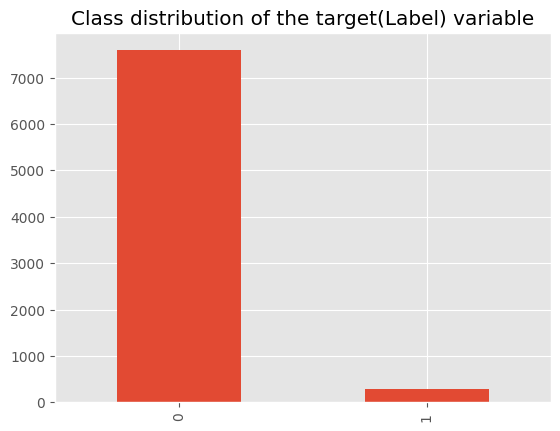

In [12]:
value_counts = df['Label'].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target(Label) variable")

In [13]:
value_counts

0    7588
1     290
Name: Label, dtype: int64

# ML SIDE

## Classification

In [14]:
#describe the latest df 

df.dtypes

Üye                         int64
Sınav                       int64
Konu                        int64
Sınav Türü                  int64
Doğru Sayısı                int64
Yanlış Sayısı               int64
Boş Sayısı                  int64
Puan                        int64
S_Giriş Zamanı             object
S_Çıkış Zamanı             object
S_süre                      int64
GirişLog                    int64
Sınıf                       int64
Ders                        int64
Aktif Materyal Sayısı       int64
Toplam Materyal Sayısı      int64
cum_lecture_time            int64
cum_study_time              int64
total_study_time            int64
Label                       int64
Overlap (secs.)           float64
dtype: object

In [15]:
#change object type to related datatype. Label and Overlap(secs.) are going to be int64

df['Overlap (secs.)'] = df['Overlap (secs.)'].astype('int64')

df.dtypes

Üye                        int64
Sınav                      int64
Konu                       int64
Sınav Türü                 int64
Doğru Sayısı               int64
Yanlış Sayısı              int64
Boş Sayısı                 int64
Puan                       int64
S_Giriş Zamanı            object
S_Çıkış Zamanı            object
S_süre                     int64
GirişLog                   int64
Sınıf                      int64
Ders                       int64
Aktif Materyal Sayısı      int64
Toplam Materyal Sayısı     int64
cum_lecture_time           int64
cum_study_time             int64
total_study_time           int64
Label                      int64
Overlap (secs.)            int64
dtype: object

In [16]:
# change the datetime type to unix time

df["S_Giriş Zamanı"] = pd.to_datetime(df["S_Giriş Zamanı"])
df["S_Çıkış Zamanı"] = pd.to_datetime(df["S_Çıkış Zamanı"])

df['S_Giriş Zamanı'] = df['S_Giriş Zamanı'].apply(lambda x: int(x.timestamp()))
df['S_Çıkış Zamanı'] = df['S_Çıkış Zamanı'].apply(lambda x: int(x.timestamp()))

df.dtypes

Üye                       int64
Sınav                     int64
Konu                      int64
Sınav Türü                int64
Doğru Sayısı              int64
Yanlış Sayısı             int64
Boş Sayısı                int64
Puan                      int64
S_Giriş Zamanı            int64
S_Çıkış Zamanı            int64
S_süre                    int64
GirişLog                  int64
Sınıf                     int64
Ders                      int64
Aktif Materyal Sayısı     int64
Toplam Materyal Sayısı    int64
cum_lecture_time          int64
cum_study_time            int64
total_study_time          int64
Label                     int64
Overlap (secs.)           int64
dtype: object

In [17]:
pd.options.display.float_format = '{:.0f}'.format

df.describe().T  # T is for transpose

,count,mean,std,min,25%,50%,75%,max
Üye,7878,1161339761,711401247,2910824,541534265,1169096127,1741043361,2428472503
Sınav,7878,508736635601,284960222327,438484723,263598348446,523324425042,776236916976,994722286690
Konu,7878,8218,2095,3536,8120,8893,9579,10905
Sınav Türü,7878,1,2,1,1,1,1,15
Doğru Sayısı,7878,7,4,0,5,8,10,90
Yanlış Sayısı,7878,1,2,0,0,1,2,42
Boş Sayısı,7878,1,4,0,0,0,0,100
Puan,7878,76,29,0,60,90,100,100
S_Giriş Zamanı,7878,1632012972,680861,1630482682,1631475527,1632084006,1632594517,1633046337
S_Çıkış Zamanı,7878,1632193778,1289985,1630483547,1631534441,1632161656,1632662768,1648291242


<AxesSubplot: xlabel='Sınıf', ylabel='count'>

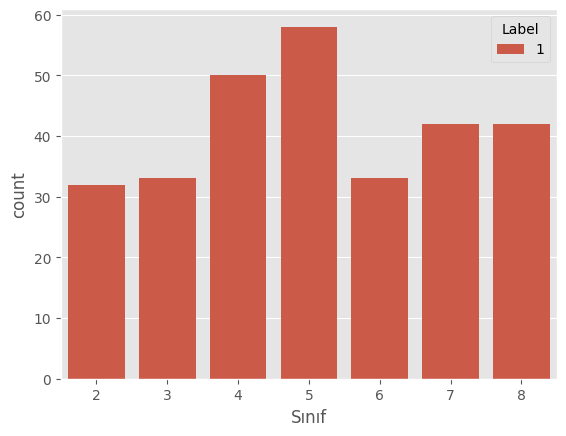

In [18]:
# Shows the Distribution of GTS with respect to Class

# Subset your data to only include Label=1
df_label_1 = df[df["Label"] == 1]

sns.countplot(x="Sınıf", hue="Label", data=df_label_1)


C:\Users\Samsung\AppData\Local\Temp\ipykernel_21260\1029728782.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Label'] == 0]["S_süre"],
C:\Users\Samsung\AppData\Local\Temp\ipykernel_21260\1029728782.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Label'] == 1]["S_süre"],


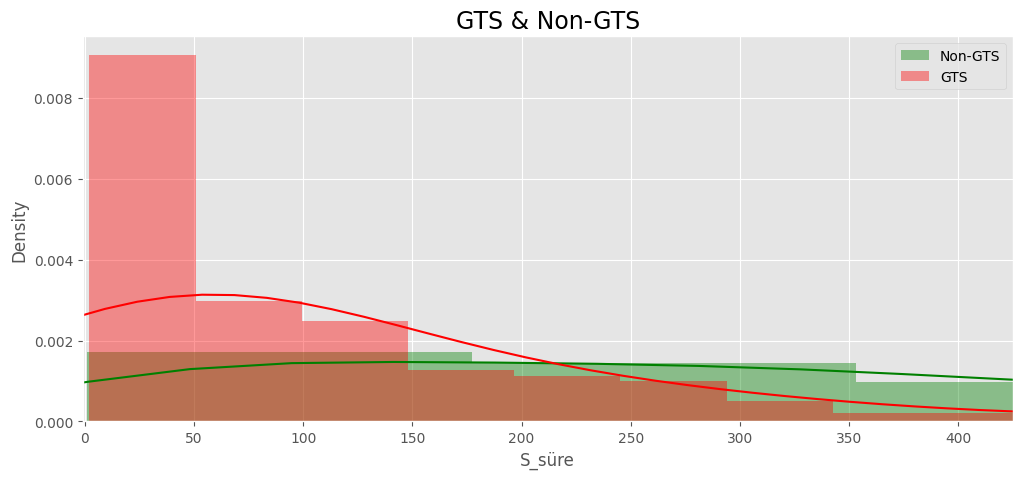

In [19]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Label'] == 0]["S_süre"], 
             color='g', label='Non-GTS')
sns.distplot(df[df['Label'] == 1]["S_süre"], 
             color='r', label='GTS')
plt.title('GTS & Non-GTS', fontsize=17)
plt.xlim([-1,425])

# Add legend
plt.legend()

plt.show()

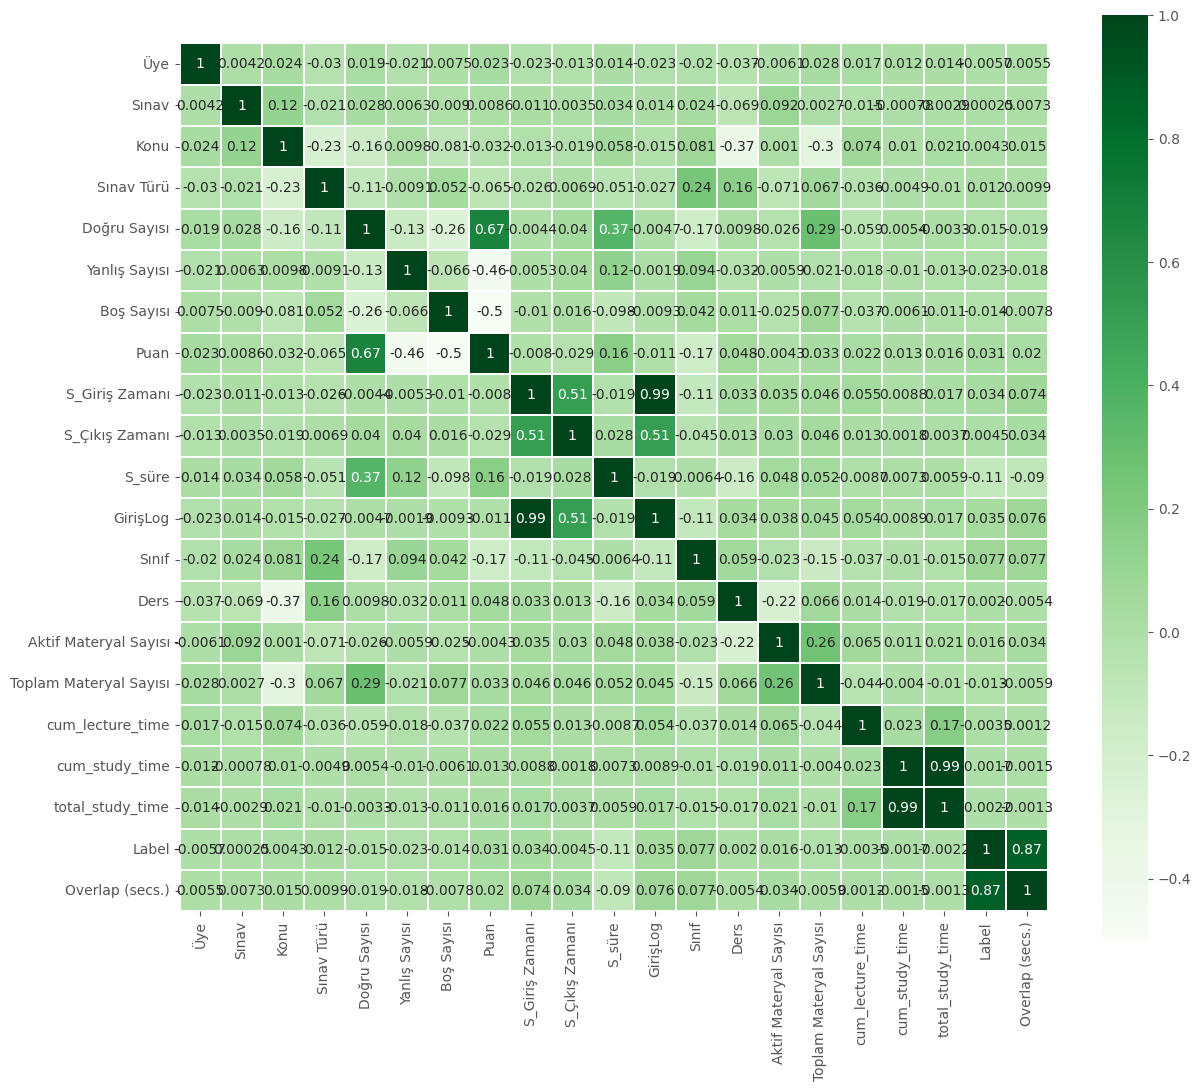

In [20]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [21]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

df = df[['Sınav Türü', "Puan","S_süre","Sınıf","Ders","Aktif Materyal Sayısı","total_study_time","Label"]]

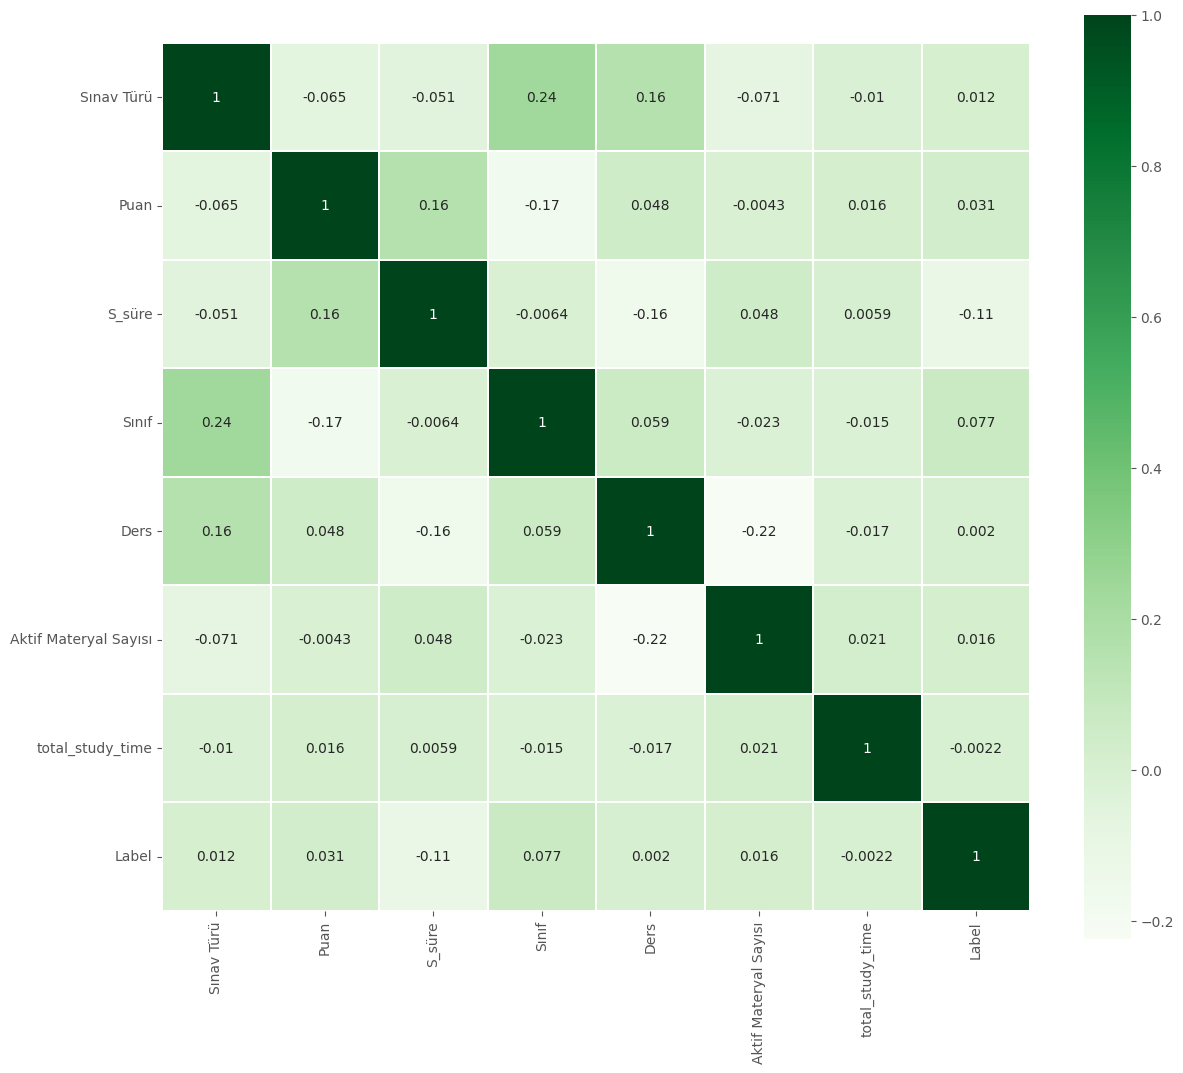

In [22]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [23]:
df.head()

,Sınav Türü,Puan,S_süre,Sınıf,Ders,Aktif Materyal Sayısı,total_study_time,Label
0,1,80,237,6,2,6,3102,0
1,1,90,241,6,9,6,3245,0
2,1,80,149,6,3,6,0,0
3,1,90,659,6,3,6,3365,0
4,1,40,115,6,11,5,3572,0


In [24]:
# to remove the columns which has single value, we investigate the unique values of each column

print(df['Sınav Türü'].unique())
print(df['Sınıf'].unique())
print(df['Label'].unique())

[ 1  7 13 15  2 12 14  5  4]
[ 6  4  3  8  2  5  7  1 23 41]
[0 1]


we have different values on the columns so no need any extraction for unique values.

In [25]:
df.dtypes

Sınav Türü               int64
Puan                     int64
S_süre                   int64
Sınıf                    int64
Ders                     int64
Aktif Materyal Sayısı    int64
total_study_time         int64
Label                    int64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Sınav Türü             7878 non-null   int64
 1   Puan                   7878 non-null   int64
 2   S_süre                 7878 non-null   int64
 3   Sınıf                  7878 non-null   int64
 4   Ders                   7878 non-null   int64
 5   Aktif Materyal Sayısı  7878 non-null   int64
 6   total_study_time       7878 non-null   int64
 7   Label                  7878 non-null   int64
dtypes: int64(8)
memory usage: 492.5 KB


We have no null values so no need to deal with missing data. Since we are planning to use xgboost, we need only int, float and bool values. Our data is already in this format so no need to convert any data type. 

### Format the data 1 - Split data into train and test

In [27]:
# since we try to predict the Label column, we need to drop this column before assigning the data to X

X = df.drop('Label', axis=1).copy()
X.head()

,Sınav Türü,Puan,S_süre,Sınıf,Ders,Aktif Materyal Sayısı,total_study_time
0,1,80,237,6,2,6,3102
1,1,90,241,6,9,6,3245
2,1,80,149,6,3,6,0
3,1,90,659,6,3,6,3365
4,1,40,115,6,11,5,3572


In [28]:
# y is the Label column which we want to predict

y = df['Label'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [29]:
### Format the data 2 : One Hot Encoding 

# One Hot Encoding is not good for logistic regression but great for tree based models for categorical variables

X_encoded = pd.get_dummies(X, columns=['Sınav Türü','Sınıf','Ders','Aktif Materyal Sayısı'])

print(X_encoded.info())

X_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Puan                      7878 non-null   int64
 1   S_süre                    7878 non-null   int64
 2   total_study_time          7878 non-null   int64
 3   Sınav Türü_1              7878 non-null   uint8
 4   Sınav Türü_2              7878 non-null   uint8
 5   Sınav Türü_4              7878 non-null   uint8
 6   Sınav Türü_5              7878 non-null   uint8
 7   Sınav Türü_7              7878 non-null   uint8
 8   Sınav Türü_12             7878 non-null   uint8
 9   Sınav Türü_13             7878 non-null   uint8
 10  Sınav Türü_14             7878 non-null   uint8
 11  Sınav Türü_15             7878 non-null   uint8
 12  Sınıf_1                   7878 non-null   uint8
 13  Sınıf_2                   7878 non-null   uint8
 14  Sınıf_3                   7878 non-null 

,Puan,S_süre,total_study_time,Sınav Türü_1,Sınav Türü_2,Sınav Türü_4,Sınav Türü_5,Sınav Türü_7,Sınav Türü_12,Sınav Türü_13,Sınav Türü_14,Sınav Türü_15,Sınıf_1,Sınıf_2,Sınıf_3,Sınıf_4,Sınıf_5,Sınıf_6,Sınıf_7,Sınıf_8,Sınıf_23,Sınıf_41,Ders_1,Ders_2,Ders_3,Ders_4,Ders_9,Ders_11,Ders_13,Ders_14,Ders_16,Ders_17,Aktif Materyal Sayısı_0,Aktif Materyal Sayısı_1,Aktif Materyal Sayısı_2,Aktif Materyal Sayısı_3,Aktif Materyal Sayısı_4,Aktif Materyal Sayısı_5,Aktif Materyal Sayısı_6,Aktif Materyal Sayısı_7,Aktif Materyal Sayısı_8,Aktif Materyal Sayısı_9,Aktif Materyal Sayısı_10,Aktif Materyal Sayısı_11,Aktif Materyal Sayısı_12,Aktif Materyal Sayısı_13,Aktif Materyal Sayısı_14,Aktif Materyal Sayısı_15,Aktif Materyal Sayısı_17,Aktif Materyal Sayısı_21,Aktif Materyal Sayısı_22,Aktif Materyal Sayısı_26,Aktif Materyal Sayısı_29
0,80,237,3102,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,241,3245,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,80,149,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,90,659,3365,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40,115,3572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# verify that y has only 0 and 1 values

y.unique()

array([0, 1], dtype=int64)

### Build a preliminary XGBoost Model

In [31]:
# check the target data imbalance

sum(y)/len(y)

0.036811373445036814

Our target variable is highly imbalanced. Thus, we use stratified sampling to split the data into train and test sets.

In [32]:
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.2, stratify=y)   #test_size=0.2 could be added to split in %80 train and %20 test 

In [33]:
# %pip install -U imbalanced-learn

In [34]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE



In [35]:
# numerical_cols = ['S_Giriş Zamanı', 'S_Çıkış Zamanı', 'Puan', 'S_süre', 'total_study_time']

# # apply standardization to numerical features
# scaler = StandardScaler()
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [36]:
# # apply SMOTE to balance target variable
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
# check if stratification is done correctly

print('y_train ratio:', sum(y_train)/len(y_train))
print('y_test ratio:',sum(y_test)/len(y_test))

y_train ratio: 0.03681370993335449
y_test ratio: 0.03680203045685279


In [38]:
len(y_test)/(len(y_test)+len(y_train))

0.20005077430820006

It seems stratified sampling is working well. 


Now we use XGB Classifier and Instead of determinin the optimal number of trees, we use early stopping to determine the optimal number of trees. Early Stopping is a method that allows you to specify a performance metric to evaluate your model on every step of the training process, and stop the training process when the performance metric no longer improves for a given number of steps.

In [39]:
# Create XGBClassifier model

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)]) 

[0]	validation_0-aucpr:0.13539
[1]	validation_0-aucpr:0.14700
[2]	validation_0-aucpr:0.15800


C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-aucpr:0.16421
[4]	validation_0-aucpr:0.16861
[5]	validation_0-aucpr:0.17284
[6]	validation_0-aucpr:0.16968
[7]	validation_0-aucpr:0.16944
[8]	validation_0-aucpr:0.16833
[9]	validation_0-aucpr:0.16662
[10]	validation_0-aucpr:0.17396
[11]	validation_0-aucpr:0.17204
[12]	validation_0-aucpr:0.17288
[13]	validation_0-aucpr:0.17875
[14]	validation_0-aucpr:0.18801
[15]	validation_0-aucpr:0.19631
[16]	validation_0-aucpr:0.19425
[17]	validation_0-aucpr:0.20799
[18]	validation_0-aucpr:0.20765
[19]	validation_0-aucpr:0.21127
[20]	validation_0-aucpr:0.21395
[21]	validation_0-aucpr:0.21022
[22]	validation_0-aucpr:0.20792
[23]	validation_0-aucpr:0.19567
[24]	validation_0-aucpr:0.20408
[25]	validation_0-aucpr:0.20096
[26]	validation_0-aucpr:0.19999
[27]	validation_0-aucpr:0.21101
[28]	validation_0-aucpr:0.21180
[29]	validation_0-aucpr:0.20259


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

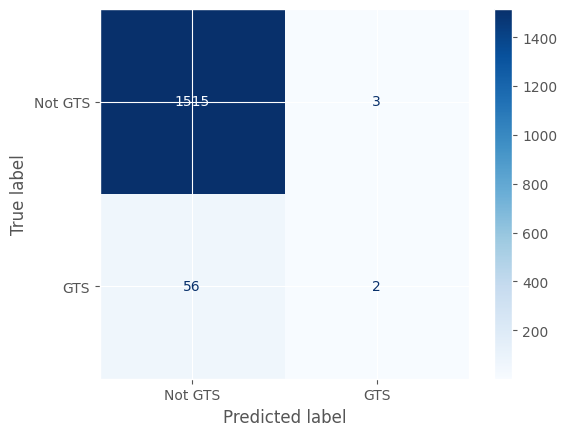

In [40]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test, cmap='Blues', values_format='d' ,display_labels=['Not GTS', 'GTS'])

Our default XGBoost model is not performing well. We need to tune the hyperparameters to improve the performance.


### Optimize the hyperparameters using cross validation and GridSearchCV

- max_depth: This hyperparameter controls the maximum depth of a tree in the model. Higher values can result in overfitting, so it's important to choose an appropriate value that balances model complexity with generalization.

- learning_rate: This hyperparameter controls the step size of each update during training. Lower values result in slower training but can improve the accuracy of the final model. Higher values can speed up training but may lead to less accurate models.

- gamma: This hyperparameter controls the minimum reduction in loss required to split a node during tree construction. Higher values make the model more conservative, while lower values can result in overfitting.

- reg_alpha: This hyperparameter controls the L1 regularization penalty on the weights of the model. Higher values result in sparser models that may be less prone to overfitting.

- reg_lambda: This hyperparameter controls the L2 regularization penalty on the weights of the model. Higher values result in smoother models that may be less prone to overfitting.

- subsample: This hyperparameter controls the fraction of the training data that is used for each boosting iteration. Lower values can improve generalization by reducing the impact of individual observations, while higher values can improve accuracy by increasing the diversity of the model.

- colsample_bytree: This hyperparameter controls the fraction of features that are used for each tree in the model. Lower values can reduce the impact of noisy features and improve generalization, while higher values can improve accuracy by capturing more information.

In [41]:
# first try

param_grid = {
    'max_depth': [6, 9],
    'learning_rate': [0.001, 0.005, 0.01],
    #'n_estimators': [100, 200],
    'gamma': [0.0, 0.25],
    'subsample': [0.5, 0.9],
    'colsample_bytree': [0.5, 0.9],
    'reg_alpha': [0],
    'reg_lambda': [10],
    'scale_pos_weight': [30, 60]
}

In [42]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [43]:
# since the operation takes too long, we commented out the code


# optimal_params = GridSearchCV(
#     estimator=clf_xgb,
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=4,
#     cv=5
# )


# optimal_params.fit(X_train, y_train)

In [44]:
# optimal_params.best_params_

In [45]:
# optimal_params.best_estimator_

In [46]:
# optimal_params.best_score_

In [47]:
# resultsdf = pd.DataFrame(optimal_params.cv_results_)
# resultsdf = resultsdf.sort_values(by=['rank_test_score'], ascending=False)
# resultsdf.head()

In [51]:
# we use xgboost model with optimized parameters.

clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learning_rate=0.01,
                            max_depth=6,                            
                            reg_alpha=0.25,
                            reg_lambda=5,
                            scale_pos_weight=30,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            n_estimators=100,
                            )

clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='aucpr', 
            eval_set=[(X_test, y_test)])

C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.10666
[1]	validation_0-aucpr:0.17116
[2]	validation_0-aucpr:0.19339
[3]	validation_0-aucpr:0.17755
[4]	validation_0-aucpr:0.18107
[5]	validation_0-aucpr:0.17914
[6]	validation_0-aucpr:0.20031
[7]	validation_0-aucpr:0.18048
[8]	validation_0-aucpr:0.18988
[9]	validation_0-aucpr:0.18228
[10]	validation_0-aucpr:0.18490
[11]	validation_0-aucpr:0.17244
[12]	validation_0-aucpr:0.18909
[13]	validation_0-aucpr:0.18316
[14]	validation_0-aucpr:0.17816
[15]	validation_0-aucpr:0.17931
[16]	validation_0-aucpr:0.18339


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

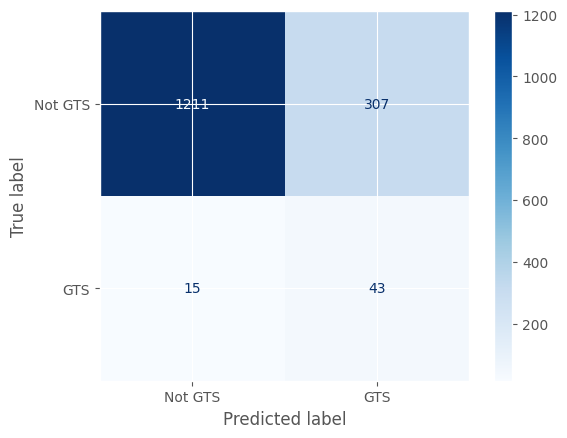

In [49]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test, cmap='Blues', values_format='d' ,display_labels=['Not GTS', 'GTS'])

In [50]:
# buraya tree çizdir.
